In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import scikit-learn tools!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
# Specify a seed so the numbers can be reproduced
np.random.seed(1998)
# Specify size of dataset, randomly generate points
n=100
x=np.array([np.random.random() for i in range(n)])
# Generate the true Y model with (normally distributed) noise
y=[-np.pi*a + np.e for a in x]
noise = np.random.normal(0,1/3,n)
y+=noise
df=pd.DataFrame({'X':x,'Y':y})
df.head()

,X,Y
0,0.559446,0.629386
1,0.761492,0.149098
2,0.244532,1.395395
3,0.771689,0.563021
4,0.354472,2.048337


Text(0, 0.5, 'Labels (Y values)')

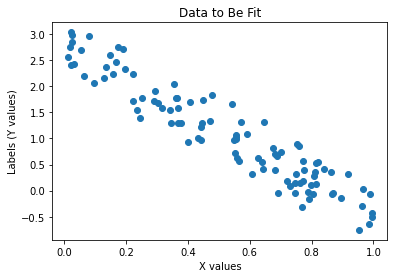

In [58]:
# Let's look at the data
plt.scatter(x, y)

plt.title('Data to Be Fit')
plt.xlabel('X values')
plt.ylabel('Labels (Y values)')

In [59]:
# Now let's train a linear regression model on our data (for now we will only train once, so we won't have a validation set)

# Split the data into a training set and test set using train_test_split
train_x, test_x, train_y, test_y = train_test_split(df[['X']], df['Y'], test_size=0.2, random_state=42)
model = LinearRegression()

# Fit the linear regression model to our data
model.fit(train_x, train_y) # train/fit on known inputs
predictions = model.predict(test_x) # predict on new data

# Print the R^2 value (how accurate was our model in predicting the y-values)?
print("Score:", model.score(test_x, test_y))

Score: 0.9012906514650834


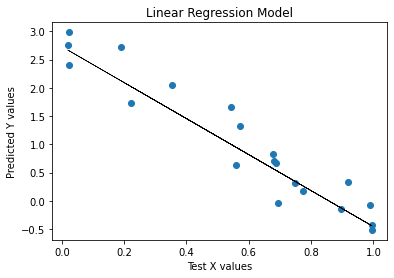

In [60]:
# Look at the output of our linear regression model vs the actual data
plt.plot(test_x, predictions, c='black', linewidth=.5) #Colored by species
plt.scatter(test_x, test_y)

plt.title('Linear Regression Model')
plt.xlabel('Test X values')
plt.ylabel('Predicted Y values')

plt.show()

In [61]:
# Look at the slope of our linear model vs the actual slope
print("Predicted slope: " + str(model.coef_[0]))
print("Actual slope: "+ str(-np.pi))

Predicted slope: -3.1891252933329257
Actual slope: -3.141592653589793


In [62]:
# Look at the y-intercept of our model vs the actual intercept
print("Predicted y-intercept: " + str(model.intercept_))
print("Actual y-intercept: "+ str(np.e))

Predicted y-intercept: 2.7317894286322537
Actual y-intercept: 2.718281828459045


In [63]:
# In the future: how to create a validation set
not_testx, test_x, not_testy, test_y = train_test_split(df[['X']], df['Y'], test_size=0.2, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(not_testx, not_testy, test_size=0.2, random_state=42)

# Let's try using linear regression on the iris dataset

In [64]:
from sklearn import datasets
iris = datasets.load_iris()
# Extracting septal and petal widths and lengths
X = pd.DataFrame(iris.data,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']) #Name columns according to sklearn API
Y = pd.DataFrame(iris.target)

X.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


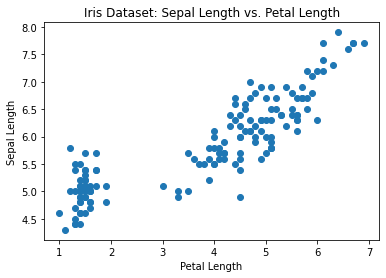

In [65]:
# Look at the data
plt.scatter(X['Petal Length'], X['Sepal Length'])

plt.title('Iris Dataset: Sepal Length vs. Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')

plt.show()

In [73]:
# Train-test split
iris_train_x, iris_test_x, iris_train_y, iris_test_y = train_test_split(X[['Sepal Length']], X[['Petal Length']], test_size=0.2, random_state=42)

In [72]:
# Create a linear regression model and train it (fit it to) our training dataset
# In this case we are training our model to predict petal length given sepal length
iris_model = LinearRegression()
iris_model.fit(iris_train_x, iris_train_y)
iris_predictions = iris_model.predict(iris_test_x) # predict on new data

print("Score:", iris_model.score(iris_test_x, iris_test_y))

Score: 0.8181245472591437


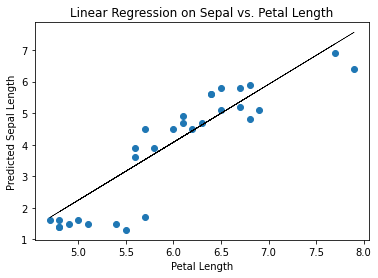

In [71]:
# Look at what our model predicts on the test dataset
plt.plot(iris_test_x, iris_predictions, c='black', linewidth=.5) #Colored by species
plt.scatter(iris_test_x, iris_test_y)

plt.title('Linear Regression on Sepal vs. Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Predicted Sepal Length')

plt.show()